In [1]:
from scipy.signal import welch
import numpy as np
import matplotlib.pyplot as plt

In [13]:
t = np.linspace(0,20,20*1000)
vals = 20*np.cos(2*np.pi*2*t)+3*np.sin(2*np.pi*15*t)
vals = vals+1*np.random.randn(len(t))
f,phi = welch(vals,fs=1/(t[1]-t[0]),nperseg=2**10)
topFreqs_PSD = f[np.argsort(-phi)[:100]]

(0.0, 20.0)

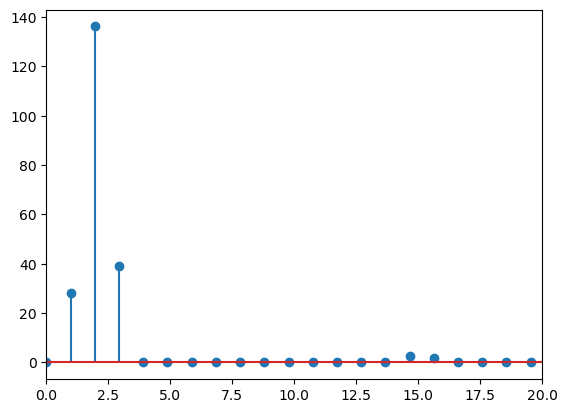

In [10]:
plt.stem(f,phi)
plt.xlim((0,20))

In [119]:
freq_FFT = np.fft.fftfreq(20*1000,t[1]-t[0])
freq_FFT = freq_FFT[:len(freq_FFT)//2]

In [120]:
freqInds_FFT = np.zeros(len(topFreqs_PSD),dtype=int)
for ind,f_PSD in enumerate(topFreqs_PSD):
    i_FFT = np.argmin(np.abs(freq_FFT-f_PSD))
    freqInds_FFT[ind] = i_FFT

freq_FFT[freqInds_FFT]

array([ 1.9499025,  2.9498525,  0.99995  , 14.6492675, 15.59922  ,
       13.6493175,  0.       , 16.59917  ,  3.899805 , 12.699365 ,
       17.59912  ,  4.899755 , 11.699415 , 18.5490725,  5.8497075,
       10.7494625, 19.5490225,  6.8496575,  9.7495125,  7.79961  ,
       20.498975 ,  8.79956  , 21.498925 , 22.4488775, 23.4488275,
       24.39878  , 25.39873  , 26.3486825, 27.3486325, 28.298585 ,
       29.298535 , 30.2484875, 31.2484375, 32.2483875, 33.19834  ,
       34.19829  , 35.1482425, 36.1481925, 37.098145 , 38.098095 ,
       39.0480475, 40.0479975, 40.99795  , 41.9979   , 42.9478525,
       43.9478025, 44.897755 , 45.897705 , 46.8476575, 47.8476075,
       48.8475575, 49.79751  , 50.79746  , 51.7474125, 52.7473625,
       53.697315 , 54.697265 , 55.6472175, 56.6471675, 57.59712  ,
       58.59707  , 59.5470225, 60.5469725, 61.496925 , 62.496875 ,
       63.496825 , 64.4467775, 65.4467275, 66.39668  , 67.39663  ,
       68.3465825, 69.3465325, 70.296485 , 71.296435 , 72.2463

In [121]:
FFT_vals = np.fft.fft(vals)/len(t)
FFT_vals = FFT_vals[:len(vals)//2]
FFT_mags = np.abs(FFT_vals)
FFT_mags

array([1.00000000e-03, 1.00062545e-03, 1.00250650e-03, ...,
       7.07417545e-06, 7.07417502e-06, 7.07417475e-06])